In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.interpolate import lagrange
from numpy.polynomial import Polynomial
from scipy.interpolate import CubicSpline
# , newton

In [19]:
# Импортирование CSV
df = pd.read_csv('student-mat.csv', sep = ',') # DataFrame
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


О наборе данных
=========
# Контекст:
Данные были получены в ходе опроса учащихся курсов математики и португальского языка в средней школе. Он содержит много интересной социальной, гендерной и учебной информации о студентах.

# Содержание:
Атрибуты для наборов данных Student-mat.csv (курс математики) и Student-por.csv (курс португальского языка):
```
school - школа ученика (двоичный код: 'GP' - Габриэль Перейра или 'MS' - Мусиньо да Силвейра)
sex — пол студента (двоичный код: «Ж» — женский или «М» — мужской)
age - возраст ученика (числовой: от 15 до 22)
address - тип домашнего адреса студента (двоичный: 'U' - городской или 'R' - сельский)
famsize — размер семейства (двоичный: «LE3» — меньше или равно 3 или «GT3» — больше 3)
Pstatus — статус совместного проживания родителей (двоичный код: «Т» — проживание вместе или «А» — раздельно)
Medu — образование матери (числовое: 0 — нет, 1 — начальное образование (4 класс), 2 — с 5 по 9 классы, 3 — среднее образование или 4 — высшее образование)
Fedu — образование отца (числовое: 0 — нет, 1 — начальное образование (4 класс), 2 — с 5 по 9 классы, 3 — среднее образование или 4 — высшее образование)
Mjob - работа матери (номинал: «учитель», «связанный со здравоохранением», гражданские «службы» (например, административные или полицейские), «на дому» или «другое»)
Fjob - работа отца (номинал: «учитель», «связанный со здравоохранением», гражданские «службы» (например, административные или полицейские), «на дому» или «другое»)
reason - причина выбрать эту школу (номинал: близок к «дому», «репутация» школы, предпочтение «курса» или «другое»)
guardian - опекун ученика (номинальное: «мать», «отец» или «другой»)
traveltime — время в пути домой в школу (числовое: 1 – <15 минут, 2 – 15 – 30 минут, 3 – 30 минут до 1 часа или 4 – >1 часа)
Studytime — еженедельное время обучения (числовое: 1 — <2 часов, 2 — 2–5 часов, 3 — 5–10 часов или 4 — >10 часов)
failures - количество прошлых сбоев класса (числовое: n, если 1<=n<3, иначе 4)
schoolup - дополнительная образовательная поддержка (двоичный код: да или нет)
famsup — образовательная поддержка семьи (двоичный код: да или нет)
paid — дополнительные платные занятия по предмету курса (математика или португальский язык) (двоичный код: да или нет)
activities – внеклассные мероприятия (бинарный вариант: да или нет)
nursery - посещал детский сад (двоичный вариант: да или нет)
higher – хочет получить высшее образование (двоичный вариант: да или нет)
Internet — доступ в Интернет дома (двоичный код: да или нет)
romantic – с романтическими отношениями (бинарный: да или нет)
famrel - качество семейных отношений (числовое: от 1 - очень плохо до 5 - отлично)
freetime – свободное время после школы (числовое: от 1 – очень низкое до 5 – очень высокое)
goout – встреча с друзьями (числовое: от 1 – очень низкий до 5 – очень высокий)
Dalc - потребление алкоголя в течение рабочего дня (числовое: от 1 - очень низкое до 5 - очень высокое)
Walc – потребление алкоголя в выходные дни (числовое: от 1 – очень низкое до 5 – очень высокое)
health – текущее состояние здоровья (числовое: от 1 – очень плохое до 5 – очень хорошее)
absences - количество пропусков в школе (числовое: от 0 до 93)
```

Эти оценки связаны с предметом курса (математика или португальский язык):
```
G1 – оценка первого периода (числовая: от 0 до 20)
G2 – оценка за второй период (числовая: от 0 до 20)
G3 — итоговая оценка (числовая: от 0 до 20, выходная цель)
Дополнительное примечание: есть несколько (382) студентов, принадлежащих к обоим наборам данных.
Этих учащихся можно идентифицировать путем поиска идентичных атрибутов, характеризующих каждого учащегося, как показано в прилагаемом файле R.
```


Для чего датасет
====
Датасет "Student Alcohol Consumption" содержит информацию о студентах и в частности о потреблении ими алкоголя. Этот датасет может быть полезен для различных анализов и исследований в области образования и здоровья студентов. Вот несколько причин, почему этот датасет может быть полезным:

    Изучение факторов, влияющих на успеваемость студентов: Вы можете использовать этот датасет, чтобы выяснить, как различные факторы, такие как уровень образования родителей, время, проведенное за учебой, и потребление алкоголя, влияют на успеваемость студентов.

    Анализ влияния здоровья и потребления алкоголя: Датасет включает информацию о здоровье студентов и их потреблении алкоголя. Это может быть полезно для изучения связи между здоровьем и образом жизни студентов.

    Разработка стратегий для улучшения образования: Исследование этого датасета может помочь школам и учебным заведениям разработать стратегии для улучшения успеваемости студентов и их общего благосостояния.

    Предсказание успеваемости студентов: На основе данных о студентах можно попытаться разработать модель для предсказания их будущей успеваемости.

    Анализ социальных и гендерных аспектов образования: Датасет также включает информацию о социальных и гендерных характеристиках студентов, что позволяет изучать социальные тенденции в образовании.

В датасете содержатся различные числовые и категориальные признаки, которые могут быть использованы для проведения анализа и построения моделей машинного обучения. Исследование этого датасета может принести пользу как образовательным учреждениям, так и исследователям в области образования и здоровья.

Задание
----
![Alt text](image-1.png)

In [20]:
# Вычисляем среднюю оценку
df['average_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

# Вычисляем суммарное потребление алкоголя
df['total_alcohol_consumption'] = df['Dalc'] + df['Walc']

# Усредняем соответствующие y-значения для одинаковых x
df_grouped = df.groupby('average_grade')['total_alcohol_consumption'].mean().reset_index()

# Выбираем данные для интерполяции
x = df_grouped['average_grade'][29:40].to_numpy()
y = df_grouped['total_alcohol_consumption'][29:40].to_numpy()

# x = np.array([0, 1, 1.5, 2, 3])
# y = np.array([2, 8, 12, 10, 20])

# Создаем точки для интерполяции
x_interp = np.linspace(min(x), max(x), 20)

# Интерполяция Лагранжа
lagrange_poly = lagrange(x, y)
y_interp_lagrange = lagrange_poly(x_interp)

# Создаем графики Plotly
trace_original = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Исходные данные',
    marker=dict(color='blue', symbol='circle'),
)

trace_interpolated = go.Scatter(
    x=x_interp,
    y=y_interp_lagrange,
    mode='lines',
    name='Интерполяция Лагранжа',
    line=dict(color='green'),
)

layout = go.Layout(
    title='Интерполяционные кривые для средней оценки и потребления алкоголя',
    xaxis=dict(title='Средняя оценка (G1, G2, G3)'),
    yaxis=dict(title='Суммарное потребление алкоголя'),
    legend=dict(x=0, y=1),
)

fig = go.Figure(data=[trace_original, trace_interpolated], layout=layout)
fig.show()

In [26]:
# Вычисляем среднюю оценку
df['average_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

# Вычисляем суммарное потребление алкоголя
df['total_alcohol_consumption'] = df['Dalc'] + df['Walc']

# Усредняем соответствующие y-значения для одинаковых x
df_grouped = df.groupby('average_grade')['total_alcohol_consumption'].mean().reset_index()

# Выбираем данные для интерполяции
x = df_grouped['average_grade'][29:40].to_numpy()
y = df_grouped['total_alcohol_consumption'][29:40].to_numpy()

# x = np.array([0, 1, 1.5, 2, 3])
# y = np.array([2, 8, 12, 10, 20])

# Создаем точки для интерполяции
x_interp = np.linspace(min(x), max(x), 20)

# Интерполяция Лагранжа
lagrange_poly = lagrange(x, y)
y_interp_lagrange = lagrange_poly(x_interp)

# Создаем графики Plotly
trace_original = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Исходные данные',
    marker=dict(color='blue', symbol='circle'),
)

trace_interpolated = go.Scatter(
    x=x_interp,
    y=y_interp_lagrange,
    mode='lines', #+markers
    name='Интерполяция Лагранжа',
    line=dict(color='green', shape='spline', width=2),  # Сглаживаем и увеличиваем толщину
)

layout = go.Layout(
    title='Интерполяционные кривые для средней оценки и потребления алкоголя (Лагранж)',
    xaxis=dict(title='Средняя оценка (G1, G2, G3)'),
    yaxis=dict(title='Суммарное потребление алкоголя'),
    legend=dict(x=0, y=1),
)

fig = go.Figure(data=[trace_original, trace_interpolated], layout=layout)
fig.show()

In [28]:
# Создаем интерполяционную функцию Ньютона
def newton_interpolation(x, x_data, y_data):
    n = len(x_data)
    p = y_data[0]
    f = 1.0

    for i in range(1, n):
        f *= (x - x_data[i - 1])
        p += f * divided_diff[0][i]

    return p

# Функция для вычисления разделенных разностей
def divided_differences(x, y):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            f[i][j] = (f[i + 1][j - 1] - f[i][j - 1]) / (x[i + j] - x[i])

    # a = newton_interpolation(x, y)
    # n = len(x) - 1  # Degree of polynomial
    # p = a[n]

    # for k in range(1, n + 1):
    #     p = a[n - k] + (x - x_data[n - k])*p

    return f

# Выбираем данные для интерполяции
x = df_grouped['average_grade'][29:40].to_numpy()
y = df_grouped['total_alcohol_consumption'][29:40].to_numpy()

# Создаем точки для интерполяции
x_interp = np.linspace(min(x), max(x), 20)

# Вычисляем разделенные разности
divided_diff = divided_differences(x, y)

# Вычисляем значения интерполяционной функции в точках
y_interp_newton = [newton_interpolation(x_i, x, y) for x_i in x_interp]

# Создаем графики Plotly
trace_original = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Исходные данные',
    marker=dict(color='blue', symbol='circle'),
)

trace_interpolated_newton = go.Scatter(
    x=x_interp,
    y=y_interp_newton,
    mode='lines',
    name='Интерполяция Ньютона',
    line=dict(color='red', shape='spline', width=2),
)

layout = go.Layout(
    title='Интерполяционные кривые для средней оценки и потребления алкоголя (Ньютон)',
    xaxis=dict(title='Средняя оценка (G1, G2, G3)'),
    yaxis=dict(title='Суммарное потребление алкоголя'),
    legend=dict(x=0, y=1),
)

fig = go.Figure(data=[trace_original, trace_interpolated_newton], layout=layout)
fig.show()


In [30]:
# Выбираем данные для интерполяции
x = df_grouped['average_grade'][29:40].to_numpy()
y = df_grouped['total_alcohol_consumption'][29:40].to_numpy()

# Создаем точки для интерполяции
x_interp = np.linspace(min(x), max(x), 100)

# Интерполяция кубическим сплайном
spline = CubicSpline(x, y)
y_interp_spline = spline(x_interp)

# Создаем графики Plotly
trace_original = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Исходные данные',
    marker=dict(color='blue', symbol='circle'),
)

trace_interpolated_spline = go.Scatter(
    x=x_interp,
    y=y_interp_spline,
    mode='lines',
    name='Интерполяция сплайном',
    line=dict(color='purple', shape='spline', width=2),
)

layout = go.Layout(
    title='Интерполяционные кривые для средней оценки и потребления алкоголя (сплайн)',
    xaxis=dict(title='Средняя оценка (G1, G2, G3)'),
    yaxis=dict(title='Суммарное потребление алкоголя'),
    legend=dict(x=0, y=1),
)

fig = go.Figure(data=[trace_original, trace_interpolated_spline], layout=layout)
fig.show()

Прочее
---

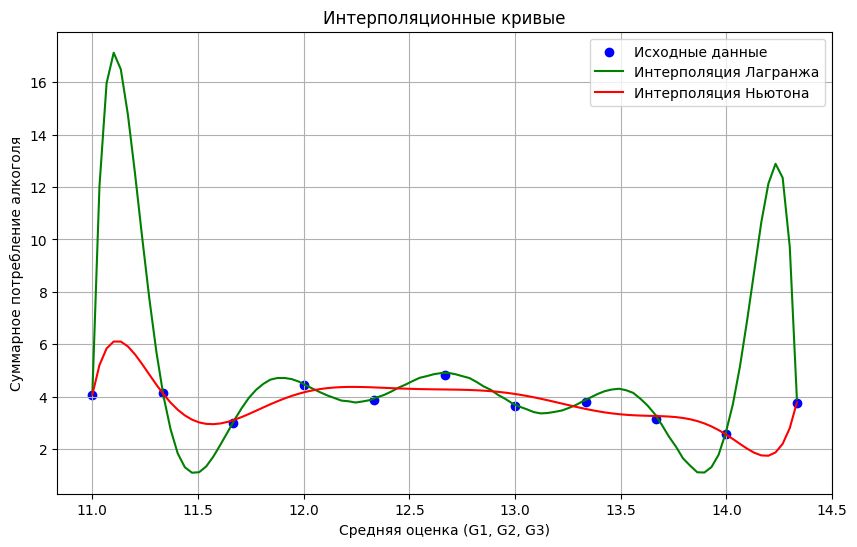

In [32]:
# Выбираем данные для интерполяции
x = df_grouped['average_grade'][29:40].to_numpy()
y = df_grouped['total_alcohol_consumption'][29:40].to_numpy()

# Интерполяция Лагранжа
lagrange_poly = lagrange(x, y)
lagrange_coeff = lagrange_poly.coef[::-1]  # Инвертируем коэффициенты, чтобы они соответствовали степеням возрастания
lagrange_polynomial = Polynomial(lagrange_coeff)

# Интерполяция Ньютона
newton_coeff = np.polynomial.polynomial.polyfit(x, y, deg=len(x)-1)
newton_polynomial = Polynomial(newton_coeff)

# Создаем точки для интерполяции
x_interp = np.linspace(min(x), max(x), 100)

# Вычисляем значения интерполяционных полиномов
y_interp_lagrange = lagrange_polynomial(x_interp)
y_interp_newton = newton_polynomial(x_interp)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Исходные данные', color='b', marker='o')
plt.plot(x_interp, y_interp_lagrange, label='Интерполяция Лагранжа', color='g')
plt.plot(x_interp, y_interp_newton, label='Интерполяция Ньютона', color='r')
plt.xlabel('Средняя оценка (G1, G2, G3)')
plt.ylabel('Суммарное потребление алкоголя')
plt.legend()
plt.title('Интерполяционные кривые')
plt.grid(True)
plt.show()

In [22]:
# Вычисляем среднюю оценку
df['average_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

# Вычисляем суммарное потребление алкоголя
df['total_alcohol_consumption'] = df['Dalc'] + df['Walc']

# Усредняем соответствующие y-значения для одинаковых x
df_grouped = df.groupby('average_grade')['total_alcohol_consumption'].mean().reset_index()

# Выбираем x точек данных для интерполяции
x = df_grouped['average_grade'][9:25].to_numpy()
y = df_grouped['total_alcohol_consumption'][9:25].to_numpy()

x = x - np.mean(x)
x = x/np.max(x)

y = y - np.mean(y)
y = y/np.max(y)

x1 = np.arange(x[0], x[15]+0.005, 0.005)

poly = lagrange(x, y)
y1 = Polynomial(poly.coef[::1])(x1)

fig = go.Figure()

# Добавляем исходные данные
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Исходные данные'
))

# Добавляем интерполяционные данные
fig.add_trace(go.Scatter(
    x=x1,
    y=y1,
    mode='lines',
    name='Интерполяция Лагранжа'
))